<a href="https://colab.research.google.com/github/SnehasishKabi/r-v-p/blob/main/AI_MINI_PROJECT_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Enter the number of vehicles: 2
Enter the number of customers: 3
Enter the locations of customers:
Enter location coordinates for the depot: 0 0
Enter location coordinates for customer 1: 2 5
Enter location coordinates for customer 2: 7 7
Enter location coordinates for customer 3: 4 5
Enter the capacity of each vehicle: 3
Enter the maximum distance each vehicle can travel: 10


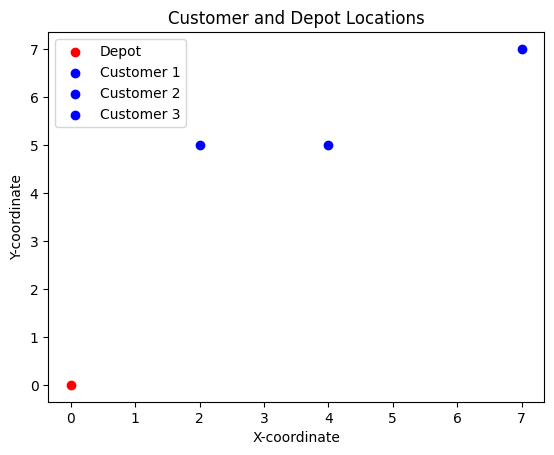


Best solution found:
Vehicle 1: Depot -> 2 -> 3 -> Depot
Vehicle 2: Depot -> 1 -> Depot
Total distance traveled: 30.678500063777513


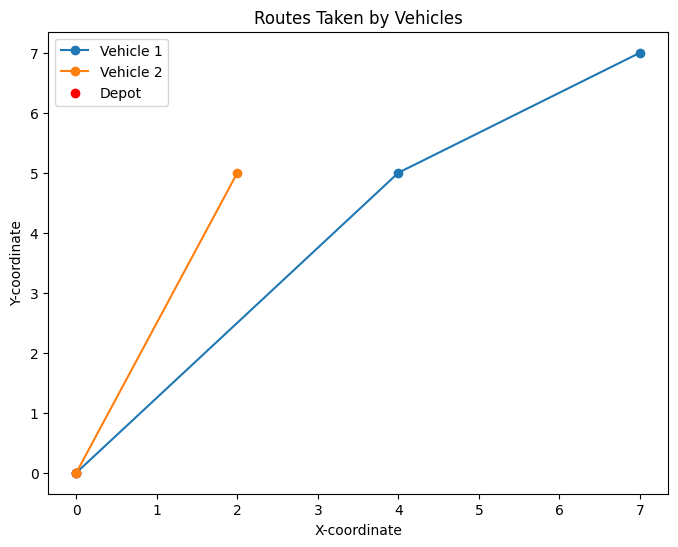

In [ ]:
import random
import matplotlib.pyplot as plt

class VehicleRoutingProblem:
    def __init__(self, num_vehicles, num_customers, customer_locations, vehicle_capacity, vehicle_max_distance):
        self.num_vehicles = num_vehicles
        self.num_customers = num_customers
        self.customer_locations = customer_locations
        self.vehicle_capacity = vehicle_capacity
        self.vehicle_max_distance = vehicle_max_distance

    def initialize_solution(self):
        solution = [[] for _ in range(self.num_vehicles)]
        customers = list(range(1, self.num_customers + 1))  # Excluding depot
        random.shuffle(customers)
        for i, customer in enumerate(customers):
            solution[i % self.num_vehicles].append(customer)
        return solution

    def evaluate_solution(self, solution):
        total_distance = 0
        for route in solution:
            current_location = 0  # Depot location
            for customer in route:
                total_distance += self.distance(current_location, customer)
                current_location = customer
            total_distance += self.distance(current_location, 0)  # Return to depot
        return total_distance

    def distance(self, location1, location2):

        x1, y1 = self.customer_locations[location1]
        x2, y2 = self.customer_locations[location2]
        return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

    def plot_locations(self):

        x_depot, y_depot = self.customer_locations[0]
        plt.scatter(x_depot, y_depot, color='red', label='Depot')
        for i in range(1, self.num_customers + 1):
            x, y = self.customer_locations[i]
            plt.scatter(x, y, color='blue', label=f'Customer {i}')
        plt.xlabel('X-coordinate')
        plt.ylabel('Y-coordinate')
        plt.title('Customer and Depot Locations')
        plt.legend()
        plt.show()

    def plot_solution(self, solution):

        plt.figure(figsize=(8, 6))
        for i, route in enumerate(solution):
            x = [self.customer_locations[loc][0] for loc in route]
            y = [self.customer_locations[loc][1] for loc in route]
            x_depot, y_depot = self.customer_locations[0]
            x.append(x_depot)
            y.append(y_depot)
            plt.plot(x, y, marker='o', label=f'Vehicle {i + 1}')
        plt.scatter(x_depot, y_depot, color='red', label='Depot')
        plt.xlabel('X-coordinate')
        plt.ylabel('Y-coordinate')
        plt.title('Routes Taken by Vehicles')
        plt.legend()
        plt.show()

    def hill_climbing(self, max_iterations):

        best_solution = self.initialize_solution()
        best_distance = self.evaluate_solution(best_solution)

        for _ in range(max_iterations):
            neighbor_solution = self.initialize_solution()
            neighbor_distance = self.evaluate_solution(neighbor_solution)

            if neighbor_distance < best_distance:
                best_solution = neighbor_solution
                best_distance = neighbor_distance

        return best_solution, best_distance

def get_user_input():
    num_vehicles = int(input("Enter the number of vehicles: "))
    num_customers = int(input("Enter the number of customers: "))
    customer_locations = {}
    print("Enter the locations of customers:")
    for i in range(num_customers + 1):  # Include depot as customer 0
        if i==0:
          x, y = map(int, input(f"Enter location coordinates for the depot: ").split())
        else:
          x, y = map(int, input(f"Enter location coordinates for customer {i}: ").split())
        customer_locations[i] = (x, y)
    vehicle_capacity = int(input("Enter the capacity of each vehicle: "))
    vehicle_max_distance = int(input("Enter the maximum distance each vehicle can travel: "))
    return num_vehicles, num_customers, customer_locations, vehicle_capacity, vehicle_max_distance

if __name__ == "__main__":
    num_vehicles, num_customers, customer_locations, vehicle_capacity, vehicle_max_distance = get_user_input()

    vrp = VehicleRoutingProblem(num_vehicles, num_customers, customer_locations, vehicle_capacity, vehicle_max_distance)

    # Plot the locations of customers and depot
    vrp.plot_locations()

    solution, total_distance = vrp.hill_climbing(max_iterations=1000)

    print("\nBest solution found:")
    for i, route in enumerate(solution):
        print(f"Vehicle {i + 1}: Depot -> {' -> '.join(map(str, route))} -> Depot")
    print(f"Total distance traveled: {total_distance}")

    # Plot the routes taken by vehicles
    vrp.plot_solution(solution)
